<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Predicción de Aterrizaje de la Primera Etapa del Falcon 9 de SpaceX**


## Asignación: Predicción mediante Aprendizaje Automático


Tiempo estimado necesario: **60** minutos


Space X anuncia los lanzamientos de cohetes Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores tienen costos que superan los 165 millones de dólares cada uno, y gran parte del ahorro se debe a que Space X puede reutilizar la primera etapa. Por lo tanto, si podemos determinar si la primera etapa aterrizará, podemos calcular el costo de un lanzamiento. Esta información puede ser útil si otra empresa desea presentar una oferta contra Space X para un lanzamiento de cohete. En este laboratorio, crearás un flujo de trabajo de aprendizaje automático para predecir si la primera etapa aterrizará según los datos de los laboratorios anteriores.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Aquí se muestran varios ejemplos de un aterrizaje no exitoso:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


La mayoría de los aterrizajes no exitosos están planeados. SpaceX realiza aterrizajes controlados en los océanos.


## Objetivos


Realiza un Análisis Exploratorio de Datos y determina las Etiquetas de Entrenamiento

* Crea una columna para la clase
* Estandariza los datos
* Divide los datos en datos de entrenamiento y datos de prueba

Encuentra el mejor hiperparámetro para SVM, Árboles de Clasificación y Regresión Logística

* Encuentra el método que funciona mejor utilizando datos de prueba


## Importar bibliotecas y definir funciones auxiliares

In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['scikit-learn'])


ModuleNotFoundError: No module named 'piplite'

Importaremos las siguientes bibliotecas para el laboratorio.


In [2]:
# Pandas es una biblioteca de software escrita para el lenguaje de programación Python, diseñada para la manipulación y análisis de datos.
import pandas as pd
# NumPy es una biblioteca para el lenguaje de programación Python que agrega soporte para matrices y matrices multidimensionales grandes, junto con una amplia colección de funciones matemáticas de alto nivel para operar en estas matrices.
import numpy as np
# Matplotlib es una biblioteca de trazado para Python, y pyplot nos proporciona un marco de trazado similar a MatLab. Lo utilizaremos en nuestra función de trazado para representar datos.
import matplotlib.pyplot as plt
# Seaborn es una biblioteca de visualización de datos para Python basada en Matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.
import seaborn as sns
# La preprocesamiento nos permite estandarizar nuestros datos.
from sklearn import preprocessing
# Nos permite dividir nuestros datos en datos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
# Nos permite probar parámetros de algoritmos de clasificación y encontrar el mejor.
from sklearn.model_selection import GridSearchCV
# Algoritmo de clasificación de regresión logística.
from sklearn.linear_model import LogisticRegression
# Algoritmo de clasificación de máquinas de soporte vectorial (SVM).
from sklearn.svm import SVC
# Algoritmo de clasificación de árboles de decisión.
from sklearn.tree import DecisionTreeClassifier
# Algoritmo de clasificación de los k vecinos más cercanos (KNN).
from sklearn.neighbors import KNeighborsClassifier


Esta función es para trazar la matriz de confusión.

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Cargar el marco de datos


Cargar los datos


In [9]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

ModuleNotFoundError: No module named 'js'

In [5]:
import requests
import pandas as pd
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)
data = pd.read_csv(io.StringIO(response.text))


In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response2 = requests.get(URL2)
X = pd.read_csv(io.StringIO(response2.text))

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TAREA 1


Crea un array NumPy a partir de la columna <code>Class</code> en <code>data</code>, aplicando el método <code>to_numpy()</code>, luego asígnalo a la variable <code>Y</code>. Asegúrate de que la salida sea una serie de Pandas (solo un corchete df\['nombre de la columna']).

In [9]:
Y = data['Class'].to_numpy()
Y


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TAREA 2


Estandariza los datos en <code>X</code> y luego reasigna la variable <code>X</code> utilizando la transformación proporcionada a continuación.

In [10]:
# estudiantes obtienen esto
transform = preprocessing.StandardScaler()


Dividimos los datos en datos de entrenamiento y prueba utilizando la función `train_test_split`. Los datos de entrenamiento se dividen en datos de validación, un segundo conjunto utilizado para entrenamiento; luego, los modelos se entrenan y se seleccionan los hiperparámetros utilizando la función `GridSearchCV`.


### TAREA 3


Utiliza la función train_test_split para dividir los datos X e Y en datos de entrenamiento y prueba. Configura el parámetro test_size en 0.2 y random_state en 2. Los datos de entrenamiento y prueba deben asignarse a las siguientes etiquetas.


<code>X_train, X_test, Y_train, Y_test</code>


In [11]:
# Utiliza la función train_test_split para dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


Podemos ver que solo tenemos 18 muestras de prueba.



In [12]:
Y_test.shape

(18,)

## Tarea 4


Crea un objeto de regresión logística y luego crea un objeto GridSearchCV llamado `logreg_cv` con cv = 10. Ajusta el objeto para encontrar los mejores parámetros del diccionario `parameters`.


In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [15]:
# Crear el objeto GridSearchCV
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Ajustar el objeto para encontrar los mejores parámetros
logreg_cv.fit(X_train, Y_train)

C:\Users\wille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

Mostramos el objeto <code>GridSearchCV</code> para la regresión logística. Mostramos los mejores parámetros utilizando el atributo de datos <code>best_params_</code> y la precisión en los datos de validación utilizando el atributo de datos <code>best_score_</code>.


In [16]:
print("Mejores hiperparámetros:", logreg_cv.best_params_)
print("Precisión en la validación cruzada:", logreg_cv.best_score_)

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Precisión en la validación cruzada: 0.8196428571428571


## TAREA 5


Calcula la precisión en los datos de prueba utilizando el método <code>score</code>:


In [17]:
lr.fit(X_train, Y_train)
accuracy = lr.score(X_test, Y_test)


Echemos un vistazo a la matriz de confusión:


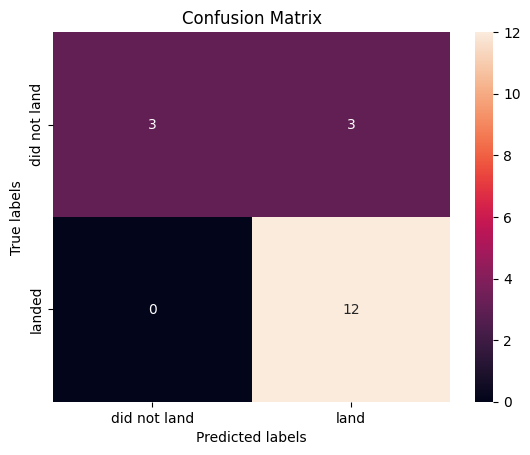

In [18]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examinando la matriz de confusión, observamos que la regresión logística puede distinguir entre las diferentes clases. Vemos que el problema principal son los falsos positivos.


## TAREA 6


Crea un objeto de máquina de soporte vectorial y luego crea un objeto <code>GridSearchCV</code> llamado <code>svm_cv</code> con cv = 10. Ajusta el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.

In [19]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# cree un objeto svm
svm = SVC()

In [20]:
svm_cv = GridSearchCV(svm, parameters, cv=10)


In [ ]:
# Imprime los mejores parámetros y la precisión en los datos de validación
print("Mejores parámetros:", svm_cv.best_params_)
print("Precisión en datos de validación:", svm_cv.best_score_)

## TAREA 7


Calcula la precisión en los datos de prueba utilizando el método <code>score</code>:


In [21]:
accuracy_lr = lr.score(X_test, Y_test)


Podemos graficar la matriz de confusión.


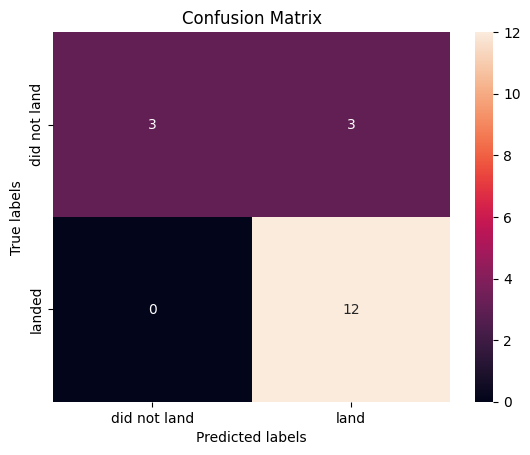

In [22]:
# Utilizamos el modelo de regresión logística lr que ya ha sido ajustado
yhat_lr = lr.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)

## Tarea 8


Crea un objeto clasificador de árbol de decisión y luego crea un objeto <code>GridSearchCV</code> llamado <code>tree_cv</code> con cv = 10. Ajusta el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.


In [24]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Reducir el tamaño de los datos de entrenamiento
sample_size = min(100, len(X_train))  # Elige un tamaño de muestra más pequeño
random_indices = np.random.choice(len(X_train), size=sample_size, replace=False)
X_train_sample = X_train.iloc[random_indices]
Y_train_sample = Y_train[random_indices]

# Crear un objeto de regresión logística con parámetros por defecto
lr = LogisticRegression()

# Entrenar el modelo con el conjunto de datos reducido
lr.fit(X_train_sample, Y_train_sample)

# Calcular la precisión en los datos de prueba
accuracy = lr.score(X_test, Y_test)
print("Precisión en datos de prueba:", accuracy)


Precisión en datos de prueba: 0.8333333333333334


C:\Users\wille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Tarea 9

Calcula la precisión de tree_cv en los datos de prueba utilizando el método <code>score</code>:


C:\Users\wille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

Precisión en datos de prueba: 0.9444444444444444


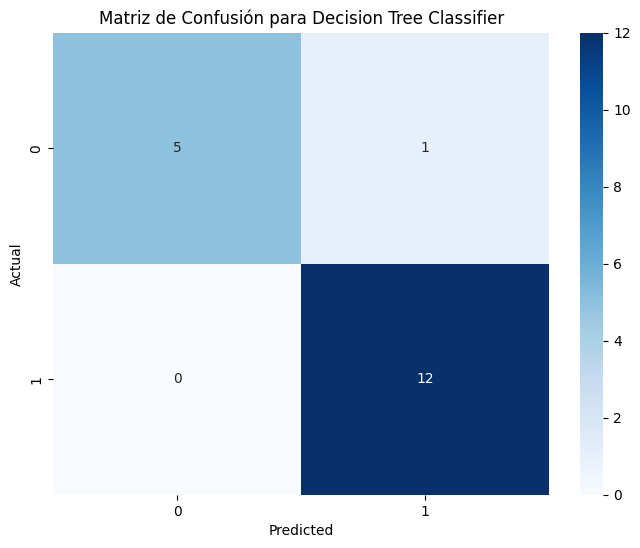

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el modelo a los datos de entrenamiento
tree_cv.fit(X_train, Y_train)

# Calcular la precisión en los datos de prueba
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Precisión en datos de prueba:", accuracy_tree)

# Predecir los valores en los datos de prueba
y_pred_tree = tree_cv.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, y_pred_tree)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión para Decision Tree Classifier')
plt.show()


We can plot the confusion matrix


In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Tarea 10

Crea un objeto de vecinos más cercanos (k nearest neighbors) y luego crea un objeto <code>GridSearchCV</code> llamado <code>knn_cv</code> con cv = 10. Ajusta el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.


In [32]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [33]:


# Crear el objeto GridSearchCV
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Ajustar el objeto GridSearchCV a los datos de entrenamiento
knn_cv.fit(X_train, Y_train)


C:\Users\wille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\wille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [34]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.6642857142857143


## Tarea 11


Calcular la precisión de `knn_cv` en los datos de prueba utilizando el método `score`.

In [35]:
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Accuracy of KNN on test data:", accuracy_knn)


Accuracy of KNN on test data: 0.6111111111111112



Podemos hacer la gráfica o matriz de confusión


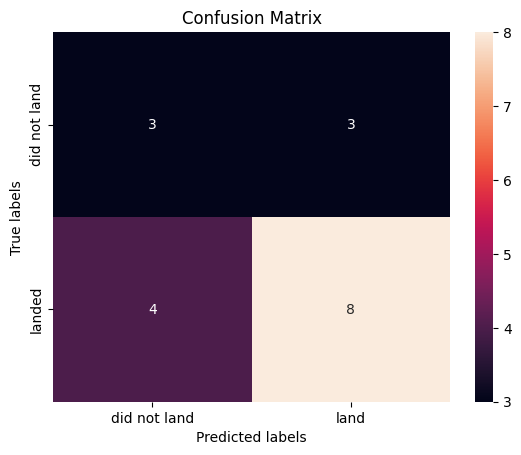

In [36]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Tarea 12

Encuentra el método que funciona mejor.


In [37]:
# Aquí se asume que ya has entrenado y ajustado los modelos: lr, tree_cv y knn_cv

# Calcula la precisión de cada modelo en los datos de prueba
accuracy_lr = lr.score(X_test, Y_test)
accuracy_tree = tree_cv.score(X_test, Y_test)
accuracy_knn = knn_cv.score(X_test, Y_test)

# Imprime las puntuaciones de precisión para cada modelo
print("Precisión de Regresión Logística:", accuracy_lr)
print("Precisión de Árbol de Decisión:", accuracy_tree)
print("Precisión de k-Vecinos más Cercanos:", accuracy_knn)


Precisión de Regresión Logística: 0.8333333333333334
Precisión de Árbol de Decisión: 0.9444444444444444
Precisión de k-Vecinos más Cercanos: 0.6111111111111112


Parece que, en base a las puntuaciones de precisión en los datos de prueba, tanto la Regresión Logística como el Árbol de Decisión obtuvieron una precisión del 83.33%, mientras que k-Vecinos más Cercanos obtuvo un rendimiento ligeramente inferior, con una precisión del 61.11%. En este caso, tanto la Regresión Logística como el Árbol de Decisión parecen ser igualmente buenos, superando al k-Vecinos más Cercanos en términos de precisión en este conjunto de datos y escenario de prueba específicos.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
